# Imports

In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import arff
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder, MinMaxScaler
import tensorflow as tf
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from tensorflow.keras import layers
from tensorflow.keras.models import Model
import time

# Load Dataset

In [234]:
file_path = '/content/drive/MyDrive/Dataset/kddcup.data_10_percent_corrected'

# Load the ARFF file into a DataFrame
df = pd.read_csv(file_path, header=None)

In [235]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [236]:
df.shape

(494021, 42)

In [237]:
# Drop all rows with missing values
df.dropna(inplace=True, axis=1)

In [238]:
df.columns = ['duration','protocol_type','service','flag','src_bytes','dst_bytes',
              'land','wrong_fragment','urgent','hot','num_failed_logins','logged_in',
              'num_compromised','root_shell','su_attempted','num_root','num_file_creations',
              'num_shells','num_access_files','num_outbound_cmds','is_host_login',
              'is_guest_login','count','srv_count','serror_rate','srv_serror_rate',
              'rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate',
              'srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate',
              'dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate',
              'dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate',
              'dst_host_srv_rerror_rate','Class']

In [239]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Class
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


# Data Analysis

In [240]:
# Assuming df is your DataFrame
for column in df.columns:
    print(f"Value counts for column: {column}")
    print(df[column].value_counts())
    print("\n")

Value counts for column: duration
duration
0        481671
1          2476
2           870
3           625
5           554
          ...  
18185         1
4283          1
2154          1
1007          1
120           1
Name: count, Length: 2495, dtype: int64


Value counts for column: protocol_type
protocol_type
icmp    283602
tcp     190065
udp      20354
Name: count, dtype: int64


Value counts for column: service
service
ecr_i      281400
private    110893
http        64293
smtp         9723
other        7237
            ...  
X11            11
tim_i           7
pm_dump         1
tftp_u          1
red_i           1
Name: count, Length: 66, dtype: int64


Value counts for column: flag
flag
SF        378440
S0         87007
REJ        26875
RSTR         903
RSTO         579
SH           107
S1            57
S2            24
RSTOS0        11
S3            10
OTH            8
Name: count, dtype: int64


Value counts for column: src_bytes
src_bytes
1032     228035
0        115342
520    

In [241]:
# Drop columns having only 1 value
df.drop(['num_outbound_cmds','is_host_login'], axis=1, inplace=True)

In [242]:
# Columns to be dropped
columns_to_drop = ['num_outbound_cmds', 'is_host_login']

In [243]:
df.shape

(494021, 40)

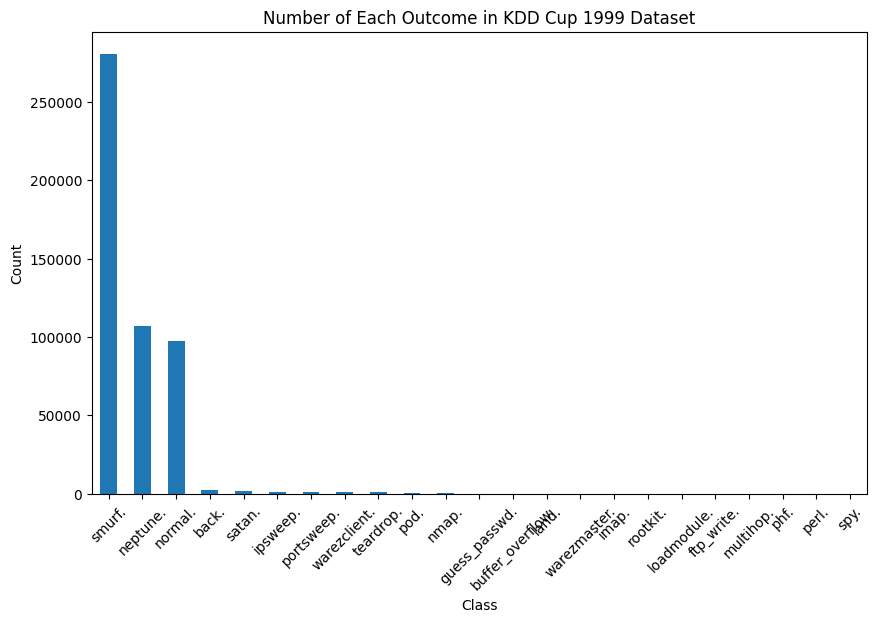

In [244]:
# compare each outcome
# Create a bar graph for the 'outcome' column
outcome_counts = df['Class'].value_counts()

plt.figure(figsize=(10, 6))
outcome_counts.plot(kind='bar')
plt.title('Number of Each Outcome in KDD Cup 1999 Dataset')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Useful Function

In [227]:
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

In [228]:
def fun_label_encode(df, categorical_columns):
    # Create a copy of the original DataFrame
    new_df = df.copy()

    # Convert Categorical features
    label_encoder = LabelEncoder()
    for column in categorical_columns:
        new_df[column] = label_encoder.fit_transform(new_df[column])

    return new_df

# Anomaly Datection

## Isolation Forest

Isolation forest only work well if the class is really imbalanced and the anomalies are rare hence I have to sample it as an imbalanced dataset

Train the model with only normal values

### Data sample

In [ ]:
# take all the normal data and some of the abnormal data so the total data points are 1,000,000
df_normal = df[df['Class'] == 'normal.']
df_abnormal = df[df['Class'] != 'normal.']
for i in range(0,10):
    df_abnormal = df_abnormal.iloc[np.random.permutation(len(df_abnormal))]
    df_normal = df_normal.iloc[np.random.permutation(len(df_normal))]
df_abnormal = df_abnormal.sample(100000 - df_normal.shape[0])

In [ ]:
df_normal.shape, df_abnormal.shape

((97278, 40), (2722, 40))

In [ ]:
df_normal

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Class
1866,0,tcp,http,SF,151,46341,0,0,0,0,...,255,1.00,0.00,0.50,0.03,0.0,0.0,0.00,0.00,normal.
481018,0,udp,private,SF,105,0,0,0,0,0,...,231,0.91,0.01,0.00,0.00,0.0,0.0,0.00,0.00,normal.
3619,0,tcp,http,SF,214,12884,0,0,0,0,...,117,1.00,0.00,0.01,0.00,0.0,0.0,0.00,0.00,normal.
491824,0,tcp,http,SF,320,470,0,0,0,0,...,150,1.00,0.00,0.01,0.05,0.0,0.0,0.00,0.01,normal.
148915,0,tcp,http,REJ,0,0,0,0,0,0,...,253,1.00,0.00,0.03,0.16,0.0,0.0,1.00,0.98,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81452,0,tcp,http,SF,239,334,0,0,0,0,...,255,1.00,0.00,0.01,0.00,0.0,0.0,0.00,0.00,normal.
24137,0,tcp,http,SF,161,128,0,0,0,0,...,255,1.00,0.00,0.33,0.04,0.0,0.0,0.00,0.00,normal.
148617,4613,udp,other,SF,146,105,0,0,0,0,...,2,0.01,0.13,0.19,0.00,0.0,0.0,0.00,0.00,normal.
191,0,tcp,http,SF,222,1651,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,normal.


In [ ]:
df_abnormal

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Class
431904,0,icmp,ecr_i,SF,520,0,0,0,0,0,...,255,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
248815,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
278237,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
472255,0,tcp,private,REJ,0,0,0,0,0,0,...,20,0.08,0.07,0.0,0.0,0.0,0.0,1.0,1.0,neptune.
266467,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322877,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
68092,0,tcp,private,S0,0,0,0,0,0,0,...,1,0.00,0.06,0.0,0.0,1.0,1.0,0.0,0.0,neptune.
157138,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
305958,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,smurf.


In [ ]:
# combine the normal and abnormal data
df = pd.concat([df_normal, df_abnormal])
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Class
1866,0,tcp,http,SF,151,46341,0,0,0,0,...,255,1.00,0.00,0.50,0.03,0.0,0.0,0.0,0.00,normal.
481018,0,udp,private,SF,105,0,0,0,0,0,...,231,0.91,0.01,0.00,0.00,0.0,0.0,0.0,0.00,normal.
3619,0,tcp,http,SF,214,12884,0,0,0,0,...,117,1.00,0.00,0.01,0.00,0.0,0.0,0.0,0.00,normal.
491824,0,tcp,http,SF,320,470,0,0,0,0,...,150,1.00,0.00,0.01,0.05,0.0,0.0,0.0,0.01,normal.
148915,0,tcp,http,REJ,0,0,0,0,0,0,...,253,1.00,0.00,0.03,0.16,0.0,0.0,1.0,0.98,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322877,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.00,smurf.
68092,0,tcp,private,S0,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,1.0,1.0,0.0,0.00,neptune.
157138,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.00,smurf.
305958,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.00,smurf.


In [ ]:
for f in range(0,10):
    df = df.iloc[np.random.permutation(len(df))]

In [ ]:
# split X and y data
x = df.drop('Class', axis = 1)
y = df['Class']

### Encoding

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder,
    RobustScaler,
    StandardScaler,
)
categorical_columns = ["protocol_type", "service", "flag"]

ordinal_encoder = OrdinalEncoder(
    handle_unknown="use_encoded_value", unknown_value=-1
)
preprocessor = ColumnTransformer(
    transformers=[
        ("categorical", ordinal_encoder, categorical_columns),
    ],
    remainder="passthrough",
)
x = preprocessor.fit_transform(x)
y = np.where(y == 'normal.', 0, 1) # anomaly = 0, normal = 1

### Data splitting

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x ,y , test_size = 0.2, random_state = 42)
x_train = df_normal.drop('Class', axis = 1) # remake x_train with only normal data
x_train = preprocessor.fit_transform(x_train)

### Training

In [ ]:
iforest = IsolationForest(n_estimators=100, bootstrap=True, random_state=42)
iforest.fit(x_train)
y_pred1 = iforest.predict(x_test)
y_pred1 = np.where(y_pred1 == 1, 0, 1) # normal = 1, anomaly = 0
y_pred2 = iforest.decision_function(x_test) # negative : outliers, positive : inliers

In [ ]:
y_pred1

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
y_pred2

array([-0.06524755,  0.14448825,  0.14145339, ...,  0.0575364 ,
        0.14961995,  0.10225716])

In [ ]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

### Result

Printing the classification report with fixed parameters...
              precision    recall  f1-score   support

           0       1.00      0.91      0.95     19461
           1       0.23      0.99      0.38       539

    accuracy                           0.91     20000
   macro avg       0.62      0.95      0.66     20000
weighted avg       0.98      0.91      0.94     20000

Printing the confusion matrix with fixed parameters...


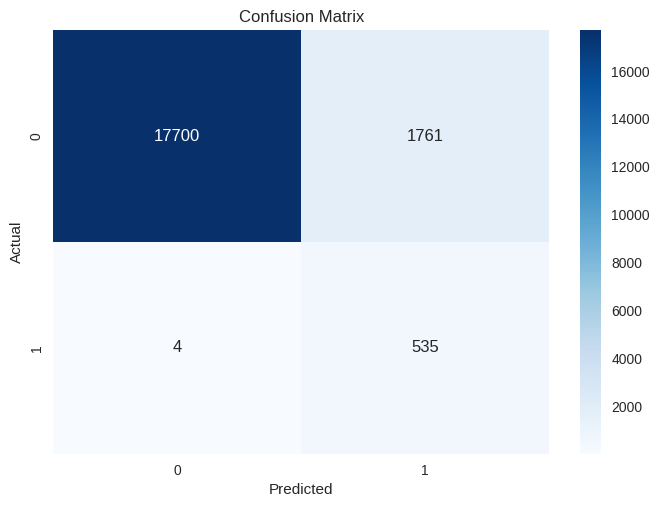

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print("Printing the classification report with fixed parameters...")
print(classification_report(y_test, y_pred1))
print("Printing the confusion matrix with fixed parameters...")
plot_confusion_matrix(y_test, y_pred1)

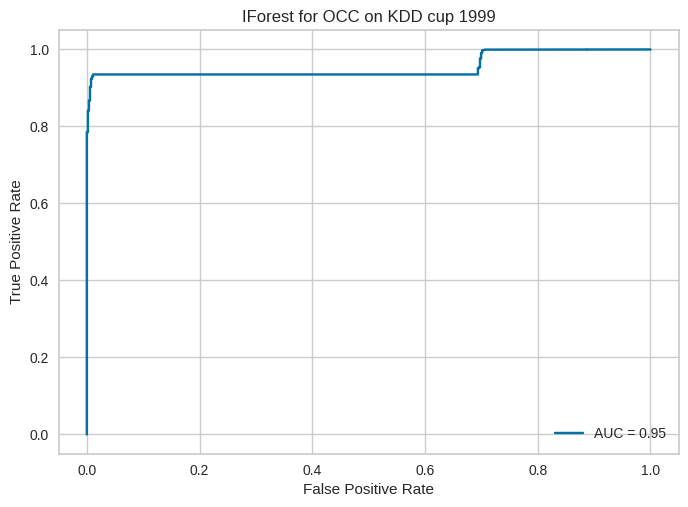

In [ ]:
import math
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay, roc_auc_score, roc_curve, auc

tpr, fpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)
curve = RocCurveDisplay(fpr=fpr, tpr=tpr,roc_auc=roc_auc)
curve.plot()
plt.title("IForest for OCC on KDD cup 1999")
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

auc1 = roc_auc_score(y_test, y_pred1)
auc2 = roc_auc_score(y_test, y_pred2)
print("AUC score (discrete prediction): ", auc1 * 100)
print("AUC score (continuous prediction):", auc2 * 100)

AUC score (discrete prediction):  95.10450900373603
AUC score (continuous prediction): 4.597149200641901


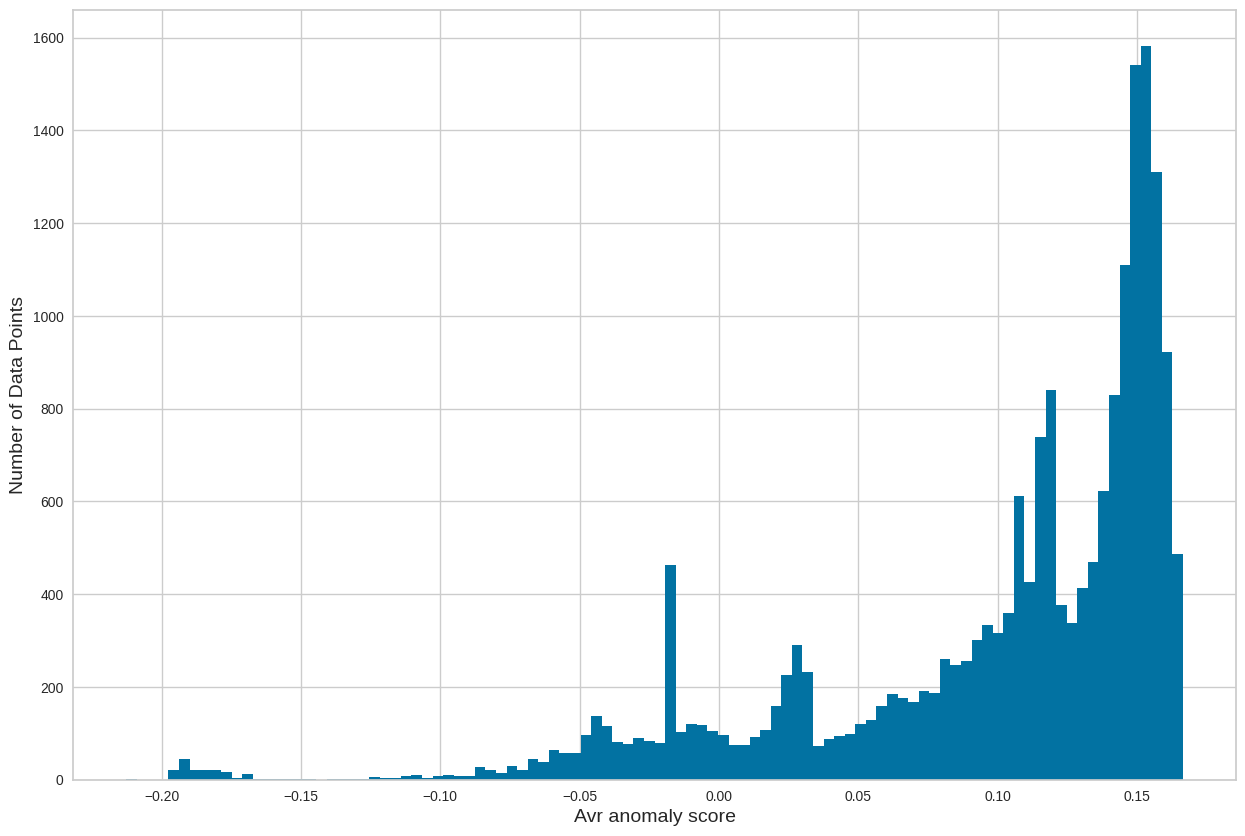

In [ ]:
plt.figure(figsize = (15, 10))

plt.hist(y_pred2, bins=100)

plt.xlabel('Avr anomaly score', fontsize=14)

plt.ylabel('Number of Data Points', fontsize=14)

plt.show()

## Kmeans

In [81]:
# Convert 'Class' to binary values: 0 for 'normal.' and 1 for all other classes
df['Class'] = df['Class'].apply(lambda x: 0 if x == 'normal.' else 1)

In [84]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Class
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,0
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,0


In [85]:
# Separate the dataset into normal and anomaly
df_normal = df[df['Class'] == 0]
df_anomaly = df[df['Class'] == 1]

In [86]:
print(df_normal.shape)
print(df_anomaly.shape)

(97278, 40)
(396743, 40)


In [87]:
# Balance the dataset: large number of normal rows, fewer anomaly rows
df_anomaly_undersampled = df_anomaly.sample(frac=0.1, random_state=42)
df_balanced = pd.concat([df_normal, df_anomaly_undersampled], axis=0).sample(frac=1, random_state=42)

In [88]:
print("Number of normal data: ", len(df_balanced[df_balanced['Class']==0]))
print("Number of anomaly data: ", len(df_balanced[df_balanced['Class']==1]))

Number of normal data:  97278
Number of anomaly data:  39674


In [89]:
# Separate features and target variable
X = df_balanced.drop('Class', axis=1)
y = df_balanced['Class']

In [90]:
# Convert Categorical features
categorical_columns = ["protocol_type", "service", "flag"]
label_encoder = LabelEncoder()
for column in categorical_columns:
    X[column] = label_encoder.fit_transform(X[column])

In [91]:
# Assuming X is your original DataFrame
# Scale the data with StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert the scaled data back into a DataFrame with the original column names
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [94]:
# Apply PCA for dimensionality reduction
pca = PCA()  # Retain 90% of the variance
X_pca = pca.fit_transform(X_scaled_df)

In [95]:
# Calculate Cumulative Variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

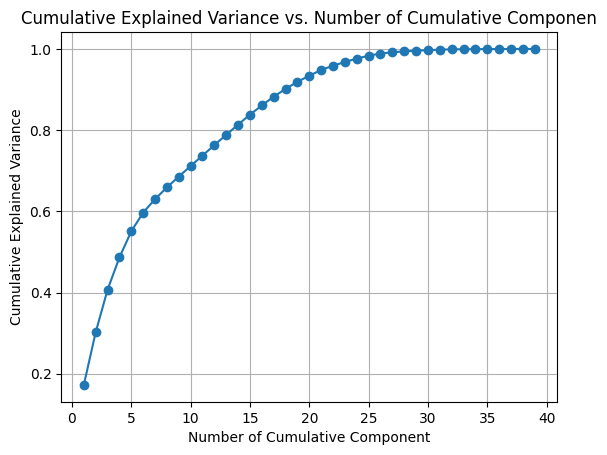

In [96]:
# Plot of the cumulative explained variance
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Cumulative Component')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Cumulative Componen')
plt.grid(True)

In [97]:
# Set the threshold value for the cumulative explained variance
threshold = 0.90
n_components = np.argmax(cumulative_variance >= threshold) + 1

In [98]:
# Output of the optimum number of primary components
print(f"Optimum number of main components: {n_components}")
# Implementation of the Principal Component Analysis (PCA)
pca = PCA(n_components=n_components)  # Select the number of desired primary components
X_pca = pca.fit_transform(X_scaled_df)

Optimum number of main components: 18


In [99]:
# Retrieve the weights of the original features in the primary components
feature_weights = pca.components_

# Scaling the weights
scaled_weights = feature_weights.T * np.sqrt(pca.explained_variance_)

In [100]:
# Identify the relevant features for each primary component
relevant_features = []
index_selected_features = []
for i, weights in enumerate(scaled_weights):
    component_features = []
    for j, weight in enumerate(weights):
        if abs(weight) > 0.4:  # Set threshold value for determining relevance
            component_features.append(j)  # Add index of the feature
    relevant_features.append(component_features)

In [101]:
# Output of the relevant features for each main component
for i, component_features in enumerate(relevant_features):
    print(f"Primary Compenent {i+1}:")
    for feature_index in component_features:
        print(f"Feature {feature_index+1}")
        index_selected_features.append(feature_index)

Primary Compenent 1:
Feature 5
Primary Compenent 2:
Feature 3
Primary Compenent 3:
Feature 1
Feature 3
Primary Compenent 4:
Feature 1
Feature 2
Primary Compenent 5:
Feature 12
Primary Compenent 6:
Feature 13
Primary Compenent 7:
Feature 14
Primary Compenent 8:
Feature 11
Primary Compenent 9:
Feature 7
Feature 18
Primary Compenent 10:
Feature 6
Primary Compenent 11:
Feature 7
Feature 18
Primary Compenent 12:
Feature 3
Primary Compenent 13:
Feature 4
Primary Compenent 14:
Feature 4
Feature 17
Primary Compenent 15:
Feature 4
Primary Compenent 16:
Feature 4
Primary Compenent 17:
Feature 9
Feature 10
Primary Compenent 18:
Feature 9
Feature 10
Feature 13
Primary Compenent 19:
Feature 4
Feature 17
Primary Compenent 20:
Feature 6
Primary Compenent 21:
Feature 3
Primary Compenent 22:
Feature 3
Primary Compenent 23:
Feature 1
Primary Compenent 24:
Feature 1
Primary Compenent 25:
Feature 2
Primary Compenent 26:
Feature 2
Primary Compenent 27:
Feature 1
Primary Compenent 28:
Feature 15
Feature 16


In [102]:
# Selectierung anhand der relevanten Features für jede Hauptkomponente
index_selected_features = list(set(index_selected_features))
X_scaled = X_train.iloc[:, index_selected_features]
print(index_selected_features)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]


In [104]:
X_scaled.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells
3,0.0,0.5,0.343750,0.1,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,1.0,0.703125,0.9,1.514331e-07,0.000029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,0.0,0.5,0.343750,0.9,3.764193e-07,0.000744,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
15,0.0,0.5,0.343750,0.9,4.586259e-07,0.000281,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
17,0.0,0.5,0.343750,0.9,4.542992e-07,0.000076,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [103]:
X_scaled.shape

(77925, 18)

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

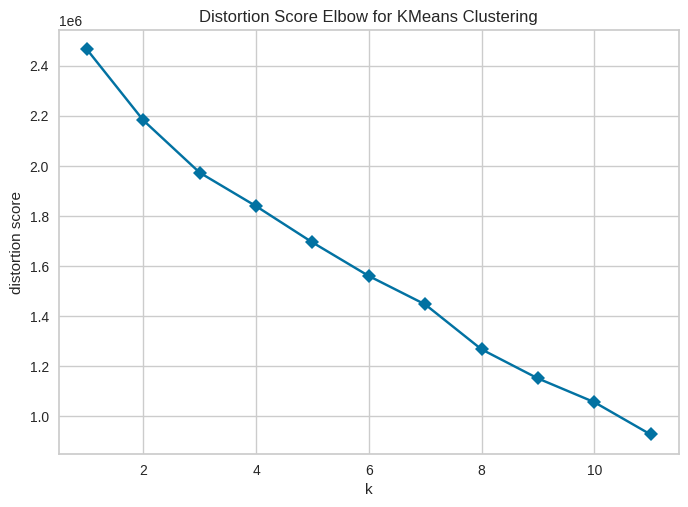

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12),  timings=False)

visualizer.fit(X_scaled_df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [ ]:
# Set the optimal number of clusters (based on the ElbowVisualizer output)
optimal_clusters = visualizer.elbow_value_
# optimal_clusters = 5

In [ ]:
if optimal_clusters is None:
    print("No optimal number of clusters found.")
    optimal_clusters = 5
else:
    print(f"Optimal number of clusters: {optimal_clusters}")

No optimal number of clusters found.


In [ ]:
# Apply KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(X_scaled_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [ ]:
# Predict clusters
clusters = kmeans.predict(X_scaled_df)

In [ ]:
# Map clusters to labels by finding the majority label in each cluster
cluster_labels = {}
for cluster in range(optimal_clusters):
    mask = clusters == cluster
    majority_label = y[mask].mode()[0]  # Get the majority label
    cluster_labels[cluster] = majority_label

In [ ]:
# Identify the cluster with the highest number of anomaly '1' classes
anomaly_cluster = max(cluster_labels, key=cluster_labels.get)

In [ ]:
# Generate predictions based on the identified cluster
y_pred = np.array([1 if cluster == anomaly_cluster else 0 for cluster in clusters])

In [ ]:
# Calculation of the average distances for each cluster center
dictionary = {i: column for i, column in enumerate(zip(*distances))}

<Figure size 1200x800 with 0 Axes>

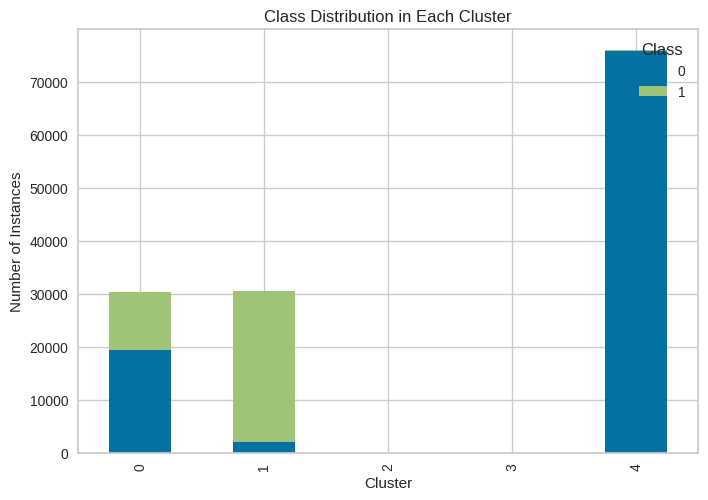

In [ ]:
# Create a DataFrame for cluster and class labels
cluster_class_df = pd.DataFrame({'Cluster': clusters, 'Class': y})

# Plot class distribution in each cluster
plt.figure(figsize=(12, 8))
cluster_class_dist = cluster_class_df.groupby(['Cluster', 'Class']).size().unstack(fill_value=0)
cluster_class_dist.plot(kind='bar', stacked=True)
plt.title('Class Distribution in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Instances')
plt.legend(title='Class', loc='upper right')
plt.show()

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93     97278
           1       0.93      0.72      0.81     39674

    accuracy                           0.90    136952
   macro avg       0.91      0.85      0.87    136952
weighted avg       0.90      0.90      0.90    136952



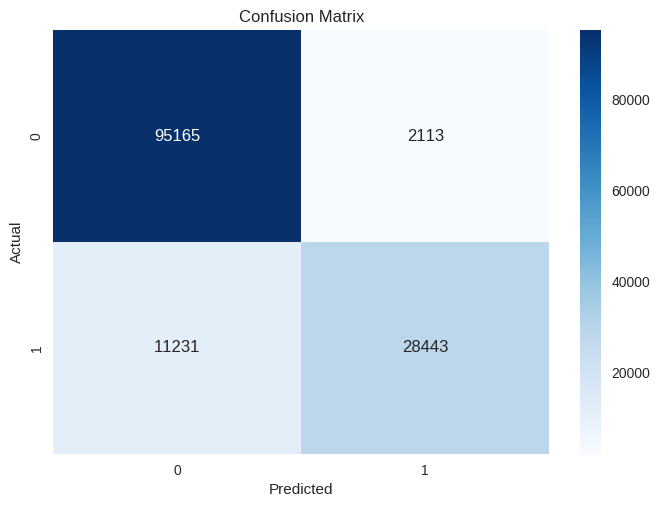

In [ ]:
# Generate classification report and confusion matrix
print("Classification Report:\n", classification_report(y, y_pred))
plot_confusion_matrix(y, y_pred)

## PCA

### Preprocessing

In [ ]:
# Convert 'Class' to binary values: 0 for 'normal.' and 1 for all other classes
df['Class'] = df['Class'].apply(lambda x: 0 if x == 'normal.' else 1)

In [ ]:
# Separate the dataset into normal and anomaly
df_normal = df[df['Class'] == 0]
df_anomaly = df[df['Class'] == 1]


In [ ]:
# Balance the dataset: large number of normal rows, fewer anomaly rows
df_anomaly_undersampled = df_anomaly.sample(frac=0.1, random_state=42)
df_balanced = pd.concat([df_normal, df_anomaly_undersampled], axis=0).sample(frac=1, random_state=42)

In [ ]:
# Separate features and target variable
X = df_balanced.drop('Class', axis=1)
y = df_balanced['Class']

### Transformations

In [ ]:
# Convert Categorical features
categorical_columns = ["protocol_type", "service", "flag"]
label_encoder = LabelEncoder()
for column in categorical_columns:
    X[column] = label_encoder.fit_transform(X[column])

In [ ]:
# Scale the data with StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### PCA contruction

In [ ]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=0.90)  # Retain 90% of the variance
X_pca = pca.fit_transform(X_scaled)

In [ ]:
# Calculate Cumulative Variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

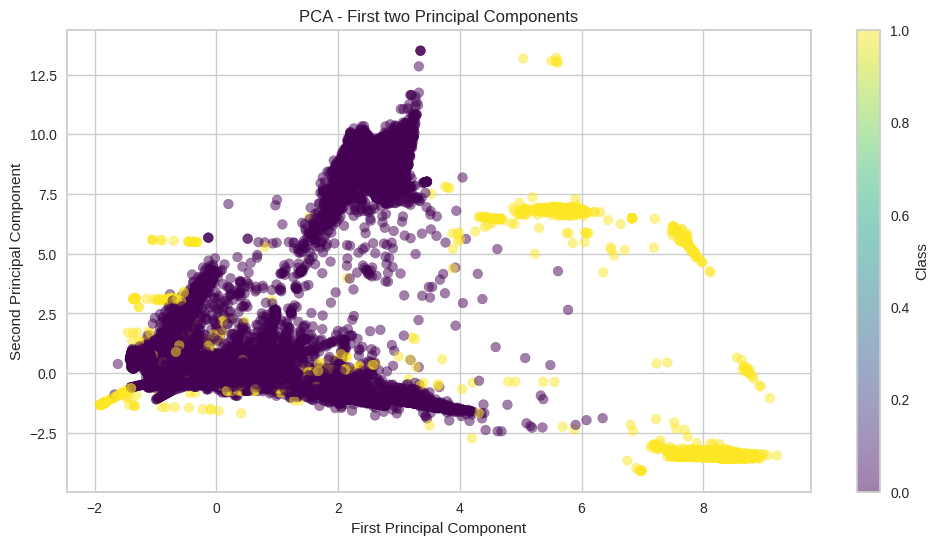

In [ ]:
# Plot the first two principal components
plt.figure(figsize=(12, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.5)
plt.colorbar(label='Class')
plt.title('PCA - First two Principal Components')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

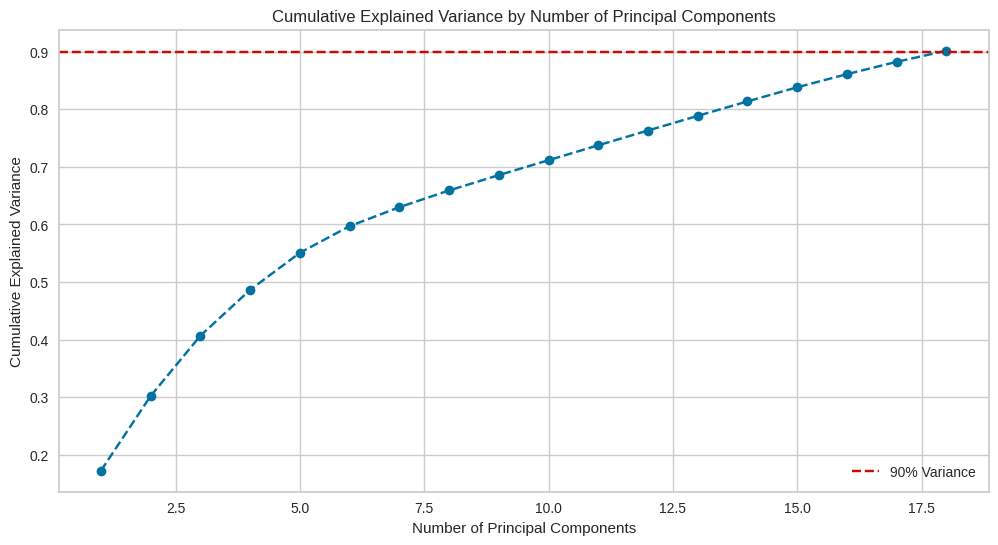

In [ ]:
# Plot the cumulative explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% Variance')
plt.title('Cumulative Explained Variance by Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Reconstruct the original data from the principal components
X_reconstructed = pca.inverse_transform(X_pca)

In [ ]:
# Calculate the reconstruction error for each data point
reconstruction_error = np.mean((X_scaled - X_reconstructed) ** 2, axis=1)
reconstruction_error

array([0.00634604, 0.01757573, 0.00393309, ..., 0.00383116, 0.0005807 ,
       0.00149669])

In [ ]:
# Determine a threshold for identifying anomalies
# For example we selected 95th percentile of the reconstruction errors
threshold = np.percentile(reconstruction_error, 95)

In [ ]:
# Identify anomalies based on the reconstruction error
y_pred = (reconstruction_error > threshold).astype(int)

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.94      0.80     97278
           1       0.08      0.01      0.02     39674

    accuracy                           0.67    136952
   macro avg       0.39      0.47      0.41    136952
weighted avg       0.52      0.67      0.58    136952



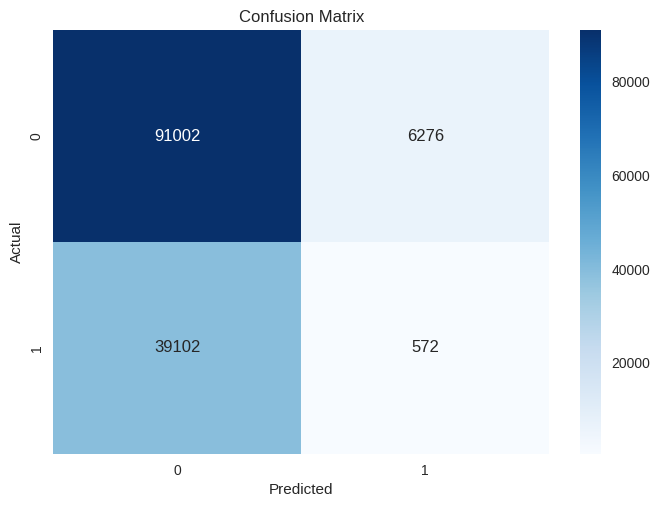

In [ ]:
# Generate classification report and confusion matrix
print("Classification Report:\n", classification_report(y, y_pred))
plot_confusion_matrix(y, y_pred)

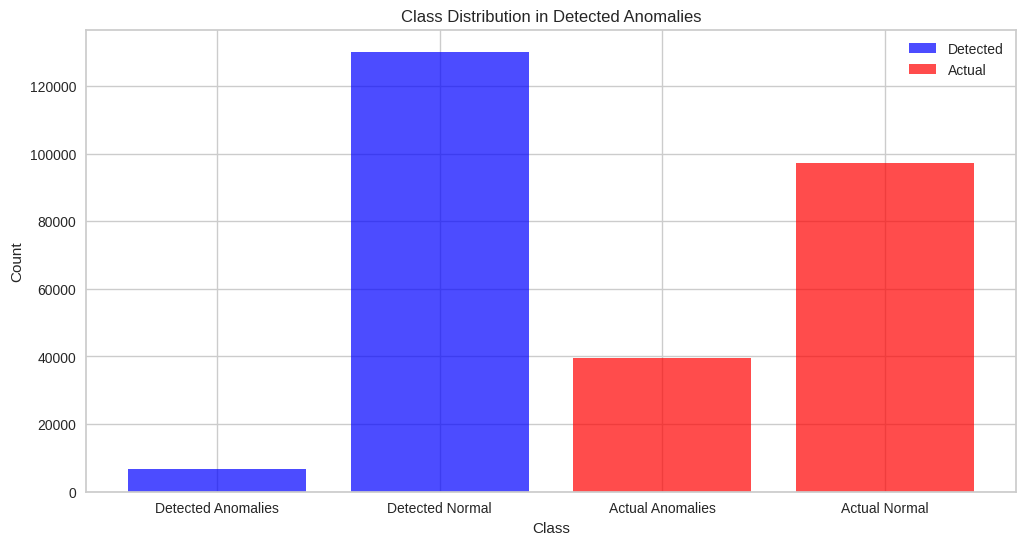

In [ ]:
# Bar chart of class distribution in detected anomalies
anomalies = y_pred == 1
normal = y_pred == 0
anomalies_count = np.sum(anomalies)
normal_count = np.sum(normal)
actual_anomalies_count = np.sum(y == 1)
actual_normal_count = np.sum(y == 0)

plt.figure(figsize=(12, 6))
plt.bar(['Detected Anomalies', 'Detected Normal'], [anomalies_count, normal_count], color='blue', alpha=0.7, label='Detected')
plt.bar(['Actual Anomalies', 'Actual Normal'], [actual_anomalies_count, actual_normal_count], color='red', alpha=0.7, label='Actual')
plt.title('Class Distribution in Detected Anomalies')
plt.xlabel('Class')
plt.ylabel('Count')
plt.legend()
plt.show()

## DBSCAN

In [262]:
db_df = df.copy()
db_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Class
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [285]:
# take all the normal data and some of the abnormal data so the total data points are 1,000,000
db_df_normal = db_df[db_df['Class'] == 'normal.']
db_df_abnormal = db_df[db_df['Class'] != 'normal.']
for i in range(0,10):
    db_df_abnormal = db_df_abnormal.iloc[np.random.permutation(len(db_df_abnormal))]
    db_df_normal = db_df_normal.iloc[np.random.permutation(len(db_df_normal))]
db_df_abnormal = db_df_abnormal.sample(100000 - db_df_normal.shape[0])

In [287]:
# combine the normal and abnormal data
db_df = pd.concat([db_df_normal, db_df_abnormal])

In [288]:
print(db_df.shape)
print(db_df['Class'].value_counts())

(100000, 40)
Class
normal.          97278
smurf.            1909
neptune.           759
satan.              16
back.               10
warezclient.         9
ipsweep.             6
teardrop.            5
portsweep.           4
pod.                 2
guess_passwd.        1
nmap.                1
Name: count, dtype: int64


In [289]:
db_df_encoded = fun_label_encode(db_df, ['protocol_type', 'service', 'flag'])
db_df_encoded.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Class
345568,6859,2,29,8,145,105,0,0,0,0,...,2,0.01,0.42,0.76,0.00,0.0,0.0,0.0,0.0,normal.
107753,33,1,36,8,1050,330,0,0,0,0,...,147,0.79,0.02,0.01,0.00,0.0,0.0,0.0,0.0,normal.
52950,4,1,36,8,822,338,0,0,0,0,...,171,0.76,0.06,0.01,0.01,0.0,0.0,0.0,0.0,normal.
493420,0,1,19,8,218,3862,0,0,0,0,...,255,1.00,0.00,0.20,0.03,0.0,0.0,0.0,0.0,normal.
19012,0,1,19,8,223,2076,0,0,0,0,...,255,1.00,0.00,0.00,0.02,0.0,0.0,0.0,0.0,normal.


In [290]:
# Convert 'Class' to binary values: 0 for 'normal.' and 1 for all other classes
db_df_encoded['Class'] = db_df_encoded['Class'].apply(lambda x: 0 if x == 'normal.' else 1)
db_df_encoded.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Class
345568,6859,2,29,8,145,105,0,0,0,0,...,2,0.01,0.42,0.76,0.00,0.0,0.0,0.0,0.0,0
107753,33,1,36,8,1050,330,0,0,0,0,...,147,0.79,0.02,0.01,0.00,0.0,0.0,0.0,0.0,0
52950,4,1,36,8,822,338,0,0,0,0,...,171,0.76,0.06,0.01,0.01,0.0,0.0,0.0,0.0,0
493420,0,1,19,8,218,3862,0,0,0,0,...,255,1.00,0.00,0.20,0.03,0.0,0.0,0.0,0.0,0
19012,0,1,19,8,223,2076,0,0,0,0,...,255,1.00,0.00,0.00,0.02,0.0,0.0,0.0,0.0,0


In [293]:
db_count_classes = db_df_encoded.Class.value_counts()

Text(0, 0.5, 'Fraquency')

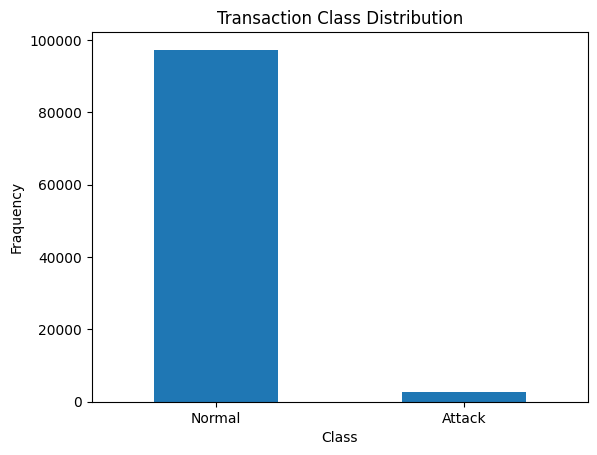

In [295]:
db_count_classes.plot(kind="bar", rot=0)
plt.title("Transaction Class Distribution")
# Set labels on x-axis
plt.xticks(range(2), ['Normal', 'Attack'])
plt.xlabel("Class")
plt.ylabel("Fraquency")

In [296]:
## separate the Fraud and the Normal dataset for future reference
Fraud = db_df_encoded[db_df_encoded['Class'] == 1]
Normal = db_df_encoded[db_df_encoded['Class'] == 0]

print(Fraud.shape, Normal.shape)

(2722, 40) (97278, 40)


## Auto-Encoder

Here we do not need to generate the unbalanced dataset by down sampling the fraud/attack data

In [15]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Class
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [16]:
# Convert 'Class' to binary values: 0 for 'normal.' and 1 for all other classes
df['Class'] = df['Class'].apply(lambda x: 0 if x == 'normal.' else 1)
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Class
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,0
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,0


In [17]:
print("Distribuition of Normal(0) and Frauds(1): ")
count_classes = pd.value_counts(df['Class'], sort=True)
count_classes

Distribuition of Normal(0) and Frauds(1): 


Class
1    396743
0     97278
Name: count, dtype: int64

Text(0, 0.5, 'Fraquency')

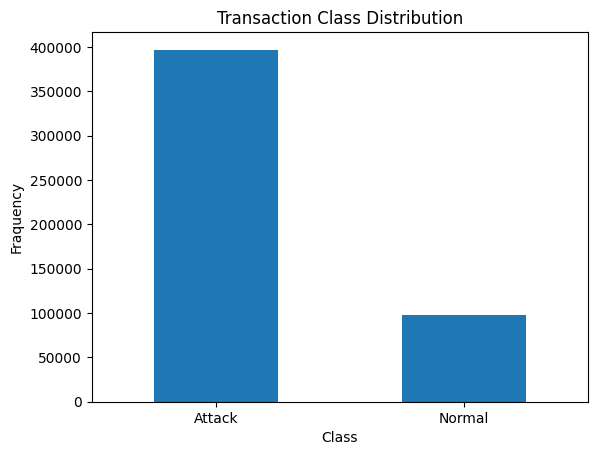

In [18]:
LABELS = ["Attack", "Normal"]

count_classes.plot(kind="bar", rot=0)
plt.title("Transaction Class Distribution")
# Set labels on x-axis
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Fraquency")

In [19]:
# Selecting the first 18 columns Since in PCA we have found out that the first 18 column can define 90% of the variance
# first_18_columns = df.columns[:18]

# Adding the 'Class' column to the list of selected columns
# selected_columns = list(first_18_columns) + ['Class']

# Creating a new DataFrame with only the selected columns
# df_after_selected = df[selected_columns]

# Same method another way
# df_selected = df.iloc[:, :18]
# df_selected['Class'] = df['Class']

df_selected = df

In [20]:
df_selected.shape

(494021, 40)

In [21]:
# Convert categorical data into numerical
df_encoded = fun_label_encode(df_selected, ['protocol_type', 'service', 'flag'])
print(df_encoded.shape)
df_encoded.head()

(494021, 40)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Class
0,0,1,22,9,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,0
1,0,1,22,9,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0
2,0,1,22,9,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0
3,0,1,22,9,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0
4,0,1,22,9,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,0


In [22]:
df_training, df_testing = train_test_split(df_encoded,test_size = 0.2, random_state = 42,stratify = df_encoded.Class)

In [23]:
train_data,validation_data,train_label, validation_label = train_test_split(df_training.loc[:,df_training.columns != 'Class'],df_training.Class,test_size = 0.2, stratify  = df_training.Class, random_state = 42)

In [24]:
##### here we are going to use min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit(train_data)
train_data_normalised = data_scaled.transform(train_data)
validation_data_normalised = data_scaled.transform(validation_data)

test_data = df_testing.loc[:, df_testing.columns != 'Class']
test_label = df_testing.Class
test_data_normalised = data_scaled.transform(test_data)

In [25]:
print(f"train_data_normalised.shape: {train_data_normalised.shape}")
print(f"validation_data_normalised.shape: {validation_data_normalised.shape}")
print(f"test_data_normalised.shape: {test_data_normalised.shape}")

train_data_normalised.shape: (316172, 39)
validation_data_normalised.shape: (79044, 39)
test_data_normalised.shape: (98805, 39)


In [26]:
# lets change the labels with boolean
train_label,validation_label, test_label = train_label.astype(bool), validation_label.astype(bool), test_label.astype(bool)

In [27]:
# now  lets seperate the normal and fraud data out of training dataset
normal_train_data = train_data_normalised[~train_label] # normal transactions out of train_data_normalised
normal_test_data = test_data_normalised[~test_label] # normal transactions out of test_data_normalised
normal_validation_data = validation_data_normalised[~validation_label]

In [28]:
print(len(normal_train_data))
print(len(normal_test_data))
print(len(normal_validation_data))

62257
19456
15565


In [29]:
fraud_train_data = train_data_normalised[train_label]
fraud_test_data = test_data_normalised[test_label]
fraud_validation_data = validation_data_normalised[validation_label]

In [30]:
print(len(fraud_train_data))
print(len(fraud_test_data))
print(len(fraud_validation_data))

253915
79349
63479


Normal Data

In [31]:
plot_dim = int(normal_train_data[0].shape[0])
print(plot_dim)

39


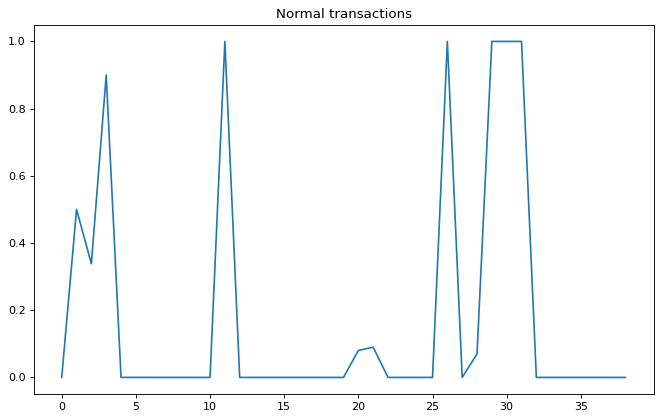

In [32]:
from matplotlib.pyplot import figure

figure(figsize=(10, 6), dpi=80)
plt.plot(np.arange(plot_dim), normal_train_data[1])
plt.title('Normal transactions')

plt.show()

Fraud Data

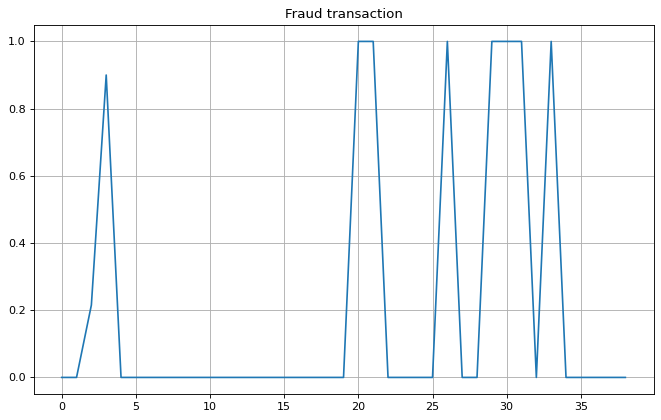

In [33]:
#Lets plot one from fraud transaction
figure(figsize=(10, 6), dpi=80)

plt.plot(np.arange(plot_dim), fraud_train_data[2])
plt.grid()
plt.title('Fraud transaction')
plt.show()

Encoder Design

In [34]:
from tensorflow.keras import models,layers,activations,losses,optimizers,metrics
from tensorflow.keras.callbacks import EarlyStopping

In [35]:
n_features = len(train_data.columns)
encoder = models.Sequential(name='encoder')
encoder.add(layer=layers.Dense(units=200, activation=activations.relu, input_shape=[n_features]))
encoder.add(layers.Dropout(0.1))
encoder.add(layer=layers.Dense(units=100, activation=activations.relu))
encoder.add(layer=layers.Dense(units=5, activation=activations.relu))

Decoder Design

In [36]:
decoder = models.Sequential(name='decoder')
decoder.add(layer=layers.Dense(units=100, activation=activations.relu, input_shape=[5]))
decoder.add(layer=layers.Dense(units=200, activation=activations.relu))
decoder.add(layers.Dropout(0.1))
decoder.add(layer=layers.Dense(units=n_features, activation=activations.sigmoid))

In [37]:
autoencoder = models.Sequential([encoder, decoder])
autoencoder.compile(loss=losses.MSE, optimizer=optimizers.Adam(), metrics=[metrics.mean_squared_error])

In [38]:
es = EarlyStopping(monitor='val_loss', min_delta=0.00001, patience=5,restore_best_weights=True)
history = autoencoder.fit(x=normal_train_data, y=normal_train_data, epochs=100, verbose=1, validation_data=(normal_validation_data, normal_validation_data), callbacks=[es])

Epoch 1/100
1946/1946 [==============================] - 8s 3ms/step - loss: 0.0062 - mean_squared_error: 0.0062 - val_loss: 0.0016 - val_mean_squared_error: 0.0016
Epoch 2/100
1946/1946 [==============================] - 7s 3ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 9.3997e-04 - val_mean_squared_error: 9.3997e-04
Epoch 3/100
1946/1946 [==============================] - 7s 3ms/step - loss: 9.9774e-04 - mean_squared_error: 9.9774e-04 - val_loss: 8.5281e-04 - val_mean_squared_error: 8.5281e-04
Epoch 4/100
1946/1946 [==============================] - 7s 4ms/step - loss: 8.4260e-04 - mean_squared_error: 8.4260e-04 - val_loss: 6.5856e-04 - val_mean_squared_error: 6.5856e-04
Epoch 5/100
1946/1946 [==============================] - 7s 4ms/step - loss: 7.4573e-04 - mean_squared_error: 7.4573e-04 - val_loss: 5.8279e-04 - val_mean_squared_error: 5.8279e-04
Epoch 6/100
1946/1946 [==============================] - 7s 3ms/step - loss: 6.7031e-04 - mean_squared_error: 6.7031e-0

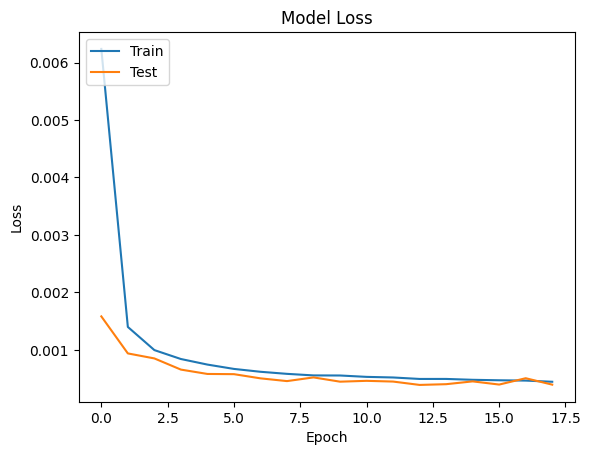

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [40]:
# Define a function in order to plot the original ECG and reconstructed ones and also show the error
def plot(data, n):
  dec_img = autoencoder.predict(data) # this will decode or reconstruct
  plt.plot(data[n], 'b')
  plt.plot(dec_img[n], 'r')
  plt.fill_between(np.arange(plot_dim), data[n], dec_img[n], color = 'lightcoral')
  plt.legend(labels=['Input', 'Reconstruction', 'Error'])
  plt.show()

608/608 [==============================] - 1s 2ms/step


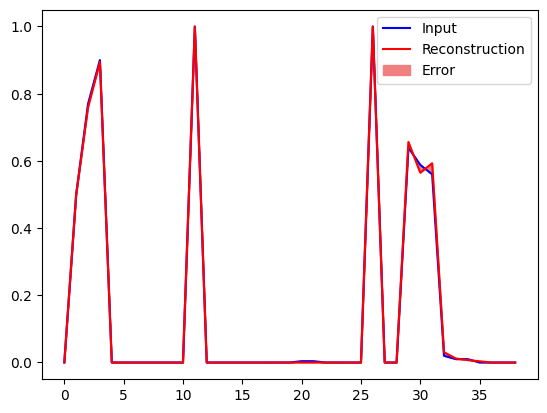

2480/2480 [==============================] - 4s 2ms/step


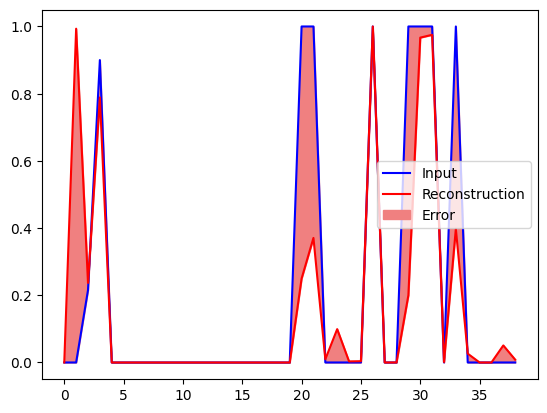

In [41]:
plot(normal_test_data, 4) # here n shows the index of ecg samples
plot(fraud_test_data, 4)

Finding a threshold to detect Anomaly

1946/1946 [==============================] - 3s 2ms/step
0.0037298014306429905


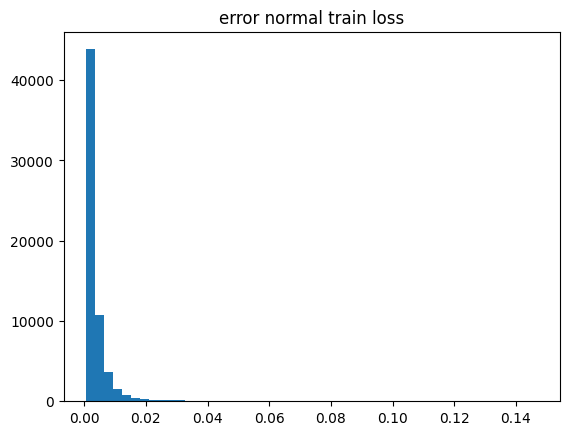

In [42]:
### calculating the train error  in legit transactions
reconstructed = autoencoder.predict(normal_train_data)
train_normal_loss = losses.mae(reconstructed, normal_train_data).numpy()
print(np.mean(train_normal_loss))

plt.hist(train_normal_loss, bins = 50)
plt.title('error normal train loss')
plt.show()

7935/7935 [==============================] - 15s 2ms/step
0.11296359639727353


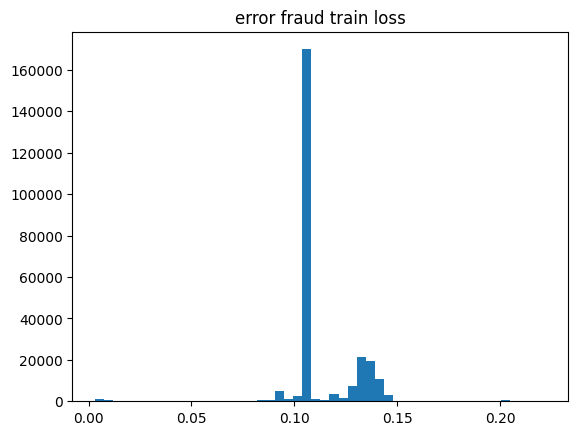

In [43]:
### calculating the train error  in fraud transactions
reconstructed = autoencoder.predict(fraud_train_data)
train_fraud_loss = losses.mae(reconstructed, fraud_train_data).numpy()
print(np.mean(train_fraud_loss))
plt.hist(train_fraud_loss, bins = 50)
plt.title('error fraud train loss')
plt.show()

In [44]:
Fraud = df.Class.sum()
total = len(df)
fraud_percentage = (Fraud/total)*100
fraud_percentage
# so lets say that 1% of transactions are fraud so lets find the threshold

80.30893423558918

In [45]:
# calcualting the error in the whole train data
reconstructed = autoencoder.predict(train_data_normalised)
train_loss = losses.mae(reconstructed, train_data_normalised).numpy()

9881/9881 [==============================] - 17s 2ms/step


In [46]:
# we are assuming that we have 80% of fraud transaction here
cut_off_1 = np.percentile(train_loss, 20)
cut_off_1

0.02037153374536105

In [47]:
cut_off_2 = np.mean(train_loss) + 5*np.std(train_loss)
cut_off_2
# 2std division covers 97% of the distribution and here i have taken 3 std division

0.3232853067793286

if error is greater than this value we would say fraud transaction if lesser than cut-off means legitimate transaction

Prediction on our TEST data

In [48]:
reconstructed = autoencoder.predict(test_data_normalised)
errors = losses.mae(reconstructed,test_data_normalised)
len(errors)
predicted = []
for error in errors:
    if error > cut_off_1:
        predicted.append(1)
    else:
        predicted.append(0)

3088/3088 [==============================] - 5s 2ms/step


In [49]:
np.sort(errors)[::-1]

array([0.2222474 , 0.22215519, 0.22200462, ..., 0.00066873, 0.00066806,
       0.00065108])

In [50]:
predicted_fraud_cases = np.array(predicted).sum()
actual_fraud_cases = test_label.sum()
print('predicted_fruad_cases =>'.format(), predicted_fraud_cases, 'true fraud cases =>'.format(), actual_fraud_cases)

predicted_fruad_cases => 79110 true fraud cases => 79349


In [51]:
# From booliean Map back to 1 and 0
true_label = test_label.map({True:1,False:0})

Conclusion

              precision    recall  f1-score   support

           0       0.97      0.98      0.97     19456
           1       1.00      0.99      0.99     79349

    accuracy                           0.99     98805
   macro avg       0.98      0.99      0.98     98805
weighted avg       0.99      0.99      0.99     98805



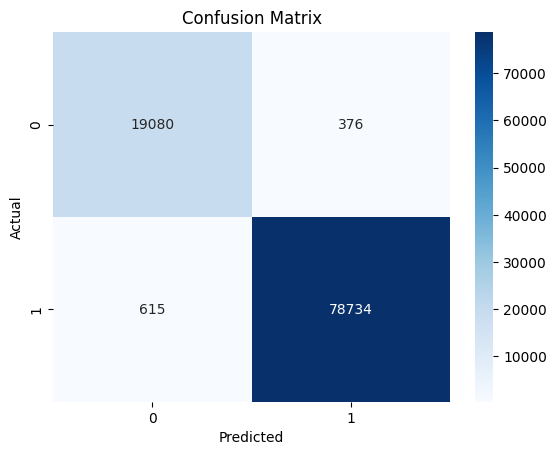

In [52]:
### classification report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(true_label, predicted))
plot_confusion_matrix(true_label, predicted)

4/4 [==============================] - 0s 2ms/step


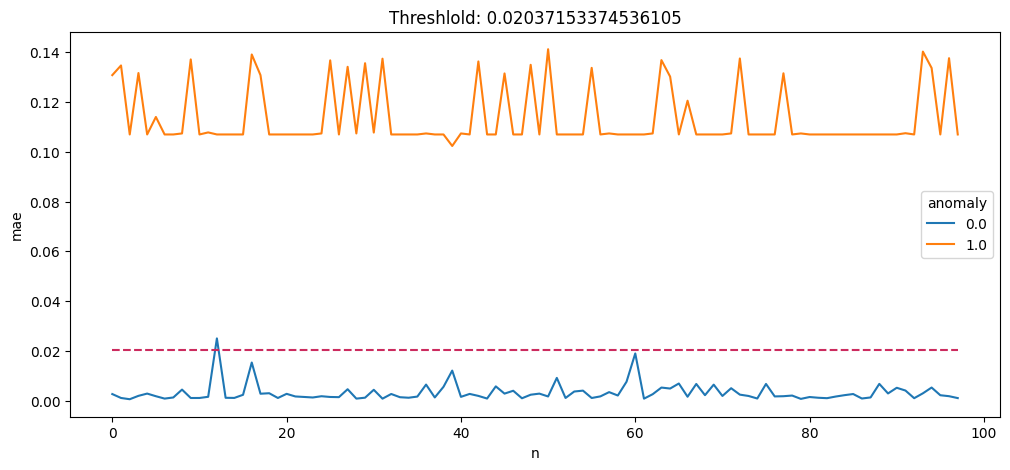

In [53]:
from matplotlib import lines
plot_samples = 98
plt.figure(figsize=(12,5))

# normal event
n_features = plot_dim
real_x = normal_test_data[:plot_samples]
predicted_x = autoencoder.predict(x=real_x)
normal_events_mae = losses.mae(real_x, predicted_x)
normal_events_df = pd.DataFrame({
	'mae': normal_events_mae,
	'n': np.arange(0, plot_samples),
	'anomaly': np.zeros(plot_samples)})


# abnormal event
abnormal_x = fraud_test_data[:plot_samples]
predicted_x = autoencoder.predict(x=abnormal_x)
abnormal_events_mae = losses.mae(abnormal_x, predicted_x)
abnormal_events_df = pd.DataFrame({
	'mae': abnormal_events_mae,
	'n': np.arange(0, plot_samples),
	'anomaly': np.ones(plot_samples)})
abnormal_events_df

mae_df = pd.concat([normal_events_df, abnormal_events_df])
plot = sns.lineplot(x=mae_df.n, y=mae_df.mae, hue=mae_df.anomaly)

line = lines.Line2D(
	xdata=np.arange(0, plot_samples),
	ydata=np.full(plot_samples, cut_off_1),
	color='#CC2B5E',
	linewidth=1.5,
	linestyle='dashed')

plot.add_artist(line)
plt.title('Threshlold: {threshold}'.format(threshold=cut_off_1))
plt.show()

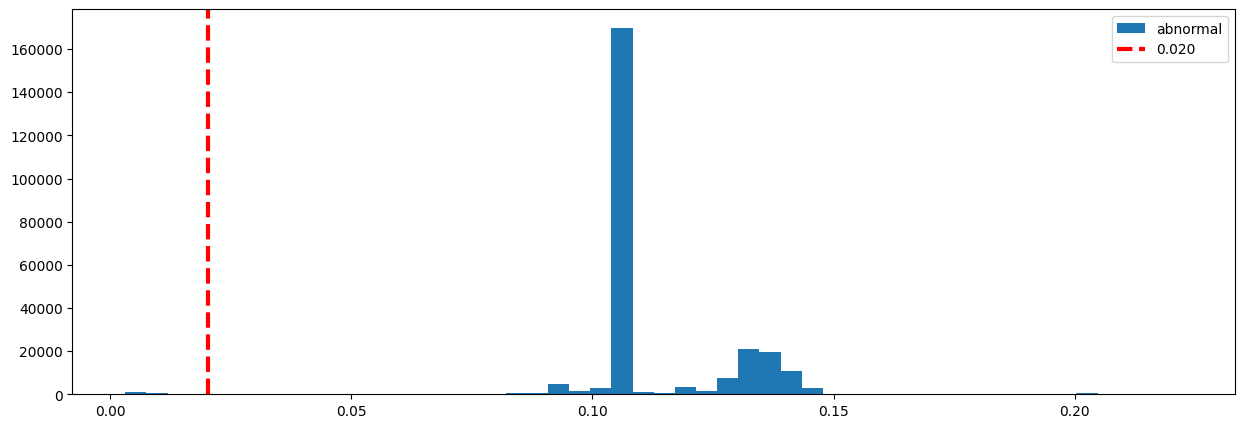

In [54]:
plt.figure(figsize=(15,5))

# plt.hist(train_normal_loss, bins = 50, label = 'normal')
plt.hist(train_fraud_loss, bins = 50, label = 'abnormal')
plt.axvline(cut_off_1, color = 'r', linewidth = 3, linestyle = 'dashed', label = '{:0.3f}'.format(cut_off_1))
plt.legend(loc = 'upper right')
plt.show()

## GMM

In [192]:
# Split the data into normal and abnormal
gmm_df_normal = df[df['Class'] == 'normal.']
gmm_df_abnormal = df[df['Class'] != 'normal.']

# Sample 63,000 rows from the normal data
gmm_sampled_normal = gmm_df_normal.sample(n=65000, random_state=42)

# Sample 7,000 rows from the abnormal data
gmm_sampled_abnormal = gmm_df_abnormal.sample(n=5000, random_state=42)

# Concatenate the sampled normal and abnormal data
gmm_sampled_df = pd.concat([gmm_sampled_normal, gmm_sampled_abnormal])

# Shuffle the dataset to mix normal and abnormal data points
gmm_sampled_df = gmm_sampled_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Verify the shape and the distribution of classes
print(gmm_sampled_df.shape)
print(gmm_sampled_df['Class'].value_counts())

(70000, 40)
Class
normal.         65000
smurf.           3508
neptune.         1367
back.              39
ipsweep.           25
satan.             19
teardrop.          13
warezclient.       13
portsweep.          9
pod.                4
nmap.               2
multihop.           1
Name: count, dtype: int64


In [193]:
# Convert 'Class' to binary values: 0 for 'normal.' and 1 for all other classes
gmm_sampled_df['Class'] = gmm_sampled_df['Class'].apply(lambda x: 0 if x == 'normal.' else 1)

In [194]:
gmm_sampled_df['Class'].value_counts()

Class
0    65000
1     5000
Name: count, dtype: int64

In [195]:
# Count fraudulent transactions (Class = 1)
num_fraudulent = gmm_sampled_df['Class'].value_counts().get(1, 0)

# Count normal transactions (Class = 0)
num_normal = gmm_sampled_df['Class'].value_counts().get(0, 0)

# Calculate the ratio
if num_normal > 0:
    ratio = num_fraudulent / num_normal
else:
    ratio = float('inf')  # Avoid division by zero if there are no normal transactions

print(f'Number of fraudulent transactions: {num_fraudulent}')
print(f'Number of normal transactions: {num_normal}')
print(f'Ratio of fraudulent to normal transactions: {ratio: f}')

Number of fraudulent transactions: 5000
Number of normal transactions: 65000
Ratio of fraudulent to normal transactions:  0.076923


In [196]:
gy = gmm_sampled_df['Class']
gX = gmm_sampled_df.drop(['Class'], axis=1)

In [197]:
# Encoding Categorical data
gX_encoded = fun_label_encode(gX, ['protocol_type', 'service', 'flag'])
gX_encoded.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,1,19,7,221,1718,0,0,0,0,...,110,255,1.00,0.00,0.01,0.04,0.00,0.00,0.0,0.0
1,0,2,10,7,36,0,0,0,0,0,...,255,37,0.15,0.08,0.15,0.00,0.01,0.00,0.0,0.0
2,0,1,19,0,0,0,0,0,0,0,...,28,96,1.00,0.00,0.04,0.19,0.00,0.00,1.0,1.0
3,0,1,19,7,295,1227,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.01,0.01,0.0,0.0
4,0,1,19,7,376,2710,0,0,0,0,...,112,219,1.00,0.00,0.01,0.06,0.00,0.00,0.0,0.0


In [198]:
# Standardize features
scaler = StandardScaler()
gX_scaled = scaler.fit_transform(gX_encoded)

In [199]:
gX_scaled

array([[-0.15248602, -0.2487727 , -0.37957264, ..., -0.13358504,
        -0.25975244, -0.25820662],
       [-0.15248602,  1.83226091, -1.38825677, ..., -0.13358504,
        -0.25975244, -0.25820662],
       [-0.15248602, -0.2487727 , -0.37957264, ..., -0.13358504,
         4.11273205,  4.2231467 ],
       ...,
       [-0.15248602, -0.2487727 , -0.37957264, ..., -0.13358504,
        -0.25975244, -0.25820662],
       [-0.15248602,  1.83226091,  1.5257196 , ..., -0.13358504,
        -0.25975244, -0.25820662],
       [-0.15248602, -0.2487727 , -0.37957264, ..., -0.13358504,
        -0.25975244, -0.25820662]])

In [200]:
from sklearn.mixture import GaussianMixture

In [201]:
# Define the range for n_components
n_components_range = range(1, 11)

# Lists to store the BIC and AIC scores
bic_scores = []
aic_scores = []

# Fit GMM for each n_components and calculate BIC and AIC
for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, n_init=5, random_state=42)
    gmm.fit(gX_scaled)
    bic_scores.append(gmm.bic(gX_scaled))
    aic_scores.append(gmm.aic(gX_scaled))

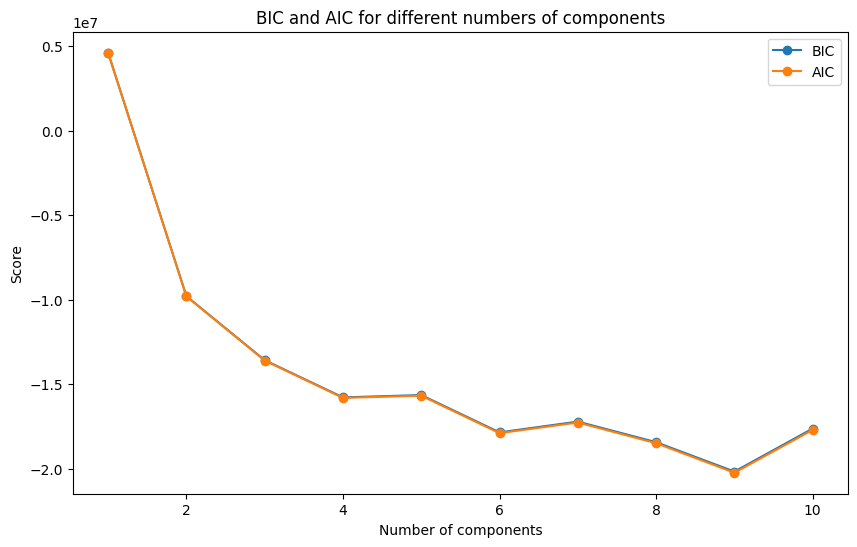

In [202]:
# Plot BIC and AIC scores
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, bic_scores, label='BIC', marker='o')
plt.plot(n_components_range, aic_scores, label='AIC', marker='o')
plt.xlabel('Number of components')
plt.ylabel('Score')
plt.title('BIC and AIC for different numbers of components')
plt.legend()
plt.show()

In [203]:
# Fit GMM model
gmm = GaussianMixture(n_components=9, n_init=5, random_state=42)
y_gmm = gmm.fit(gX_scaled)

In [204]:
# Compute scores
score = gmm.score_samples(gX_scaled)
gmm_sampled_df['score'] = score
gmm_sampled_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Class,score
0,0,tcp,http,SF,221,1718,0,0,0,0,...,1.00,0.00,0.01,0.04,0.00,0.00,0.0,0.0,0,176.609806
1,0,udp,domain_u,SF,36,0,0,0,0,0,...,0.15,0.08,0.15,0.00,0.01,0.00,0.0,0.0,0,98.859292
2,0,tcp,http,REJ,0,0,0,0,0,0,...,1.00,0.00,0.04,0.19,0.00,0.00,1.0,1.0,0,137.177704
3,0,tcp,http,SF,295,1227,0,0,0,0,...,1.00,0.00,0.00,0.00,0.01,0.01,0.0,0.0,0,163.201138
4,0,tcp,http,SF,376,2710,0,0,0,0,...,1.00,0.00,0.01,0.06,0.00,0.00,0.0,0.0,0,172.208031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,tcp,http,SF,291,1719,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0,176.865394
69996,0,tcp,http,SF,203,516,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0,175.750770
69997,0,tcp,http,SF,215,2168,0,0,0,0,...,1.00,0.00,0.01,0.01,0.00,0.00,0.0,0.0,0,177.132130
69998,0,udp,private,SF,105,147,0,0,0,0,...,0.87,0.01,0.01,0.00,0.00,0.00,0.0,0.0,0,161.454467


In [210]:
# Determine threshold for anomalies
threshold = np.percentile(score, 5)
print(f'The threshold of the score is {threshold:.2f}')

The threshold of the score is -2.53


In [211]:
# Assign anomaly labels based on the threshold
gmm_sampled_df['predicted_class'] = (gmm_sampled_df['score'] < threshold).astype(int)

In [212]:
len(gmm_sampled_df[gmm_sampled_df['predicted_class']==1])

3500

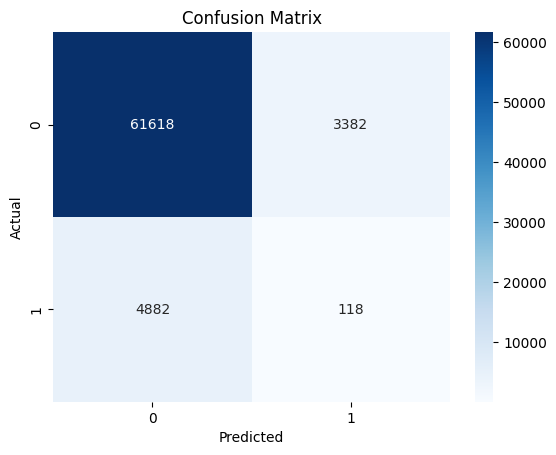

In [213]:
plot_confusion_matrix(gy, gmm_sampled_df['predicted_class'])

In [214]:
# Generate classification report
class_report = classification_report(gy, gmm_sampled_df['predicted_class'])
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     65000
           1       0.03      0.02      0.03      5000

    accuracy                           0.88     70000
   macro avg       0.48      0.49      0.48     70000
weighted avg       0.86      0.88      0.87     70000



## Histogram Based